In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl

# compute HPP

In [2]:
mosuo_data = pd.read_csv('dim_rel_mosuo_avg_scaled.csv', index_col = 0)

# Perform k-means clustering analysis
model = KMeans(3, random_state = 1) 
model.fit(mosuo_data)
cluster_labels = model.fit_predict(mosuo_data)
raw_results = mosuo_data.assign(cl_k3=cluster_labels)

for n in range(len(raw_results['cl_k3'].unique())): 
    each_cluster = raw_results.index[raw_results['cl_k3']==n] 
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster))) 
    print(*raw_results.index[raw_results['cl_k3']==n], sep = ", ")

mosuo_HPP = raw_results


Cluster 1 Relationship:35
Teammates in sports, Predecessor-Successor, Business partners, Dakpa or Lama (person who performs traditional rituals)-Ordinary person, Principal-Teacher, Driver-Passenger, Religious followers, Native-Tourist, Religious leader-Congregant, Foreman-Laborer, Between people who can do different kinds of handcrafts, Between villagers, Person playing the flute at a bonfire party-Person dancing at a bonfire party, Competitors in sports, Chief-Deputy, Guest-Host, Politician-Supporter, Interviewer-Job applicant, Carpenter-Bricklayer, Judge-Contestant, Between village headman and villagers, Officer-Soldier, Doctor-Nurse, Cattle Rancher-Cattle Herder, A person and their crush, Doctor-Patient, Distant relatives, Police officer-Civilian, Co-workers, Customer-Server, Guide-Tourist, Chef-Customer, Employer-Employee, Representative-Citizen, Neighbors

Cluster 2 Relationship:26
Siblings, Uncle-Niece/Nephew, Ancestor-Descendant, Brother-Sister, Classmates, Re-recognized godpar

# read FAVEE

In [3]:
scores_FAVEE = pd.read_csv('mosuo_FAVEE_scores.csv', index_col = 0)
scores_FAVEE

,Formality,Activeness,Valence,Exchange,Equality
Siblings,-0.083482,1.317468,1.021735,-0.270058,1.512952
Teammates in sports,1.286915,0.393750,0.088186,-0.657458,2.005481
Aunt-Niece/Nephew,-0.136521,0.886455,0.674736,-0.386520,-1.370941
Predecessor-Successor,0.811685,-0.294388,0.279623,-0.483729,0.482307
Business partners,0.931259,0.410965,-0.411275,1.881847,1.464320
...,...,...,...,...,...
A person and their in laws,-0.802862,1.148437,-0.443207,-0.006525,-1.021734
Representative-Citizen,1.327470,-0.441803,0.688041,-0.255650,-0.364646
Criminal and their accomplice,-0.471852,-0.156730,-1.975905,-0.285358,1.155286
Neighbors,-0.338253,0.270440,-0.120515,0.001596,-0.120793


# cube

In [4]:
def get_cube(limits=None):
    """get the vertices, edges, and faces of a cuboid defined by its limits

    limits = np.array([[x_min, x_max],
                       [y_min, y_max],
                       [z_min, z_max]])
    """
    v = np.array([[0, 0, 0], [0, 0, 1],
                  [0, 1, 0], [0, 1, 1],
                  [1, 0, 0], [1, 0, 1],
                  [1, 1, 0], [1, 1, 1]], dtype=int)

    if limits is not None:
        v = limits[np.arange(3)[np.newaxis, :].repeat(8, axis=0), v]

    e = np.array([[0, 1], [0, 2], [0, 4],
                  [1, 3], [1, 5],
                  [2, 3], [2, 6],
                  [3, 7],
                  [4, 5], [4, 6],
                  [5, 7],
                  [6, 7]], dtype=int)

    f = np.array([[0, 2, 3, 1],
                  [0, 4, 5, 1],
                  [0, 4, 6, 2],
                  [1, 5, 7, 3],
                  [2, 6, 7, 3],
                  [4, 6, 7, 5]], dtype=int)

    return v, e, f

In [5]:
pca_5c_3k = scores_FAVEE.assign(cl_k3=cluster_labels)

# transform into range[0,1]
Equality_values = pca_5c_3k['Equality']
Exchange_values = pca_5c_3k['Exchange']
pca_5c_3k['Equality_plot'] = (Equality_values -Equality_values.min())/(Equality_values.max()-Equality_values.min())
pca_5c_3k['Exchange_plot'] = (Exchange_values -Exchange_values.min())/(Exchange_values.max()-Exchange_values.min())

# Assign names to each label
pca_5c_3k['rel'] = pca_5c_3k.index
pca_5c_3k.loc[pca_5c_3k['cl_k3']==0,'cluster'] = 'Public'
pca_5c_3k.loc[pca_5c_3k['cl_k3']==1,'cluster'] = 'Private'
pca_5c_3k.loc[pca_5c_3k['cl_k3']==2,'cluster'] = 'Hostile'

pca_5c_3k.head()

,Formality,Activeness,Valence,Exchange,Equality,cl_k3,Equality_plot,Exchange_plot,rel,cluster
Siblings,-0.083482,1.317468,1.021735,-0.270058,1.512952,1,0.833315,0.348539,Siblings,Private
Teammates in sports,1.286915,0.393750,0.088186,-0.657458,2.005481,0,0.941115,0.259587,Teammates in sports,Public
Aunt-Niece/Nephew,-0.136521,0.886455,0.674736,-0.386520,-1.370941,1,0.202116,0.321798,Aunt-Niece/Nephew,Private
Predecessor-Successor,0.811685,-0.294388,0.279623,-0.483729,0.482307,0,0.607737,0.299477,Predecessor-Successor,Public
Business partners,0.931259,0.410965,-0.411275,1.881847,1.464320,0,0.822671,0.842642,Business partners,Public


In [6]:
print(pca_5c_3k['Activeness'].max(),pca_5c_3k['Activeness'].min())
print(pca_5c_3k['Formality'].max(),pca_5c_3k['Formality'].min())
print(pca_5c_3k['Valence'].max(),pca_5c_3k['Valence'].min())

2.37639843132739 -2.84647219864173
2.39457992262594 -1.85217400419893
1.94411895362407 -2.89971583629628


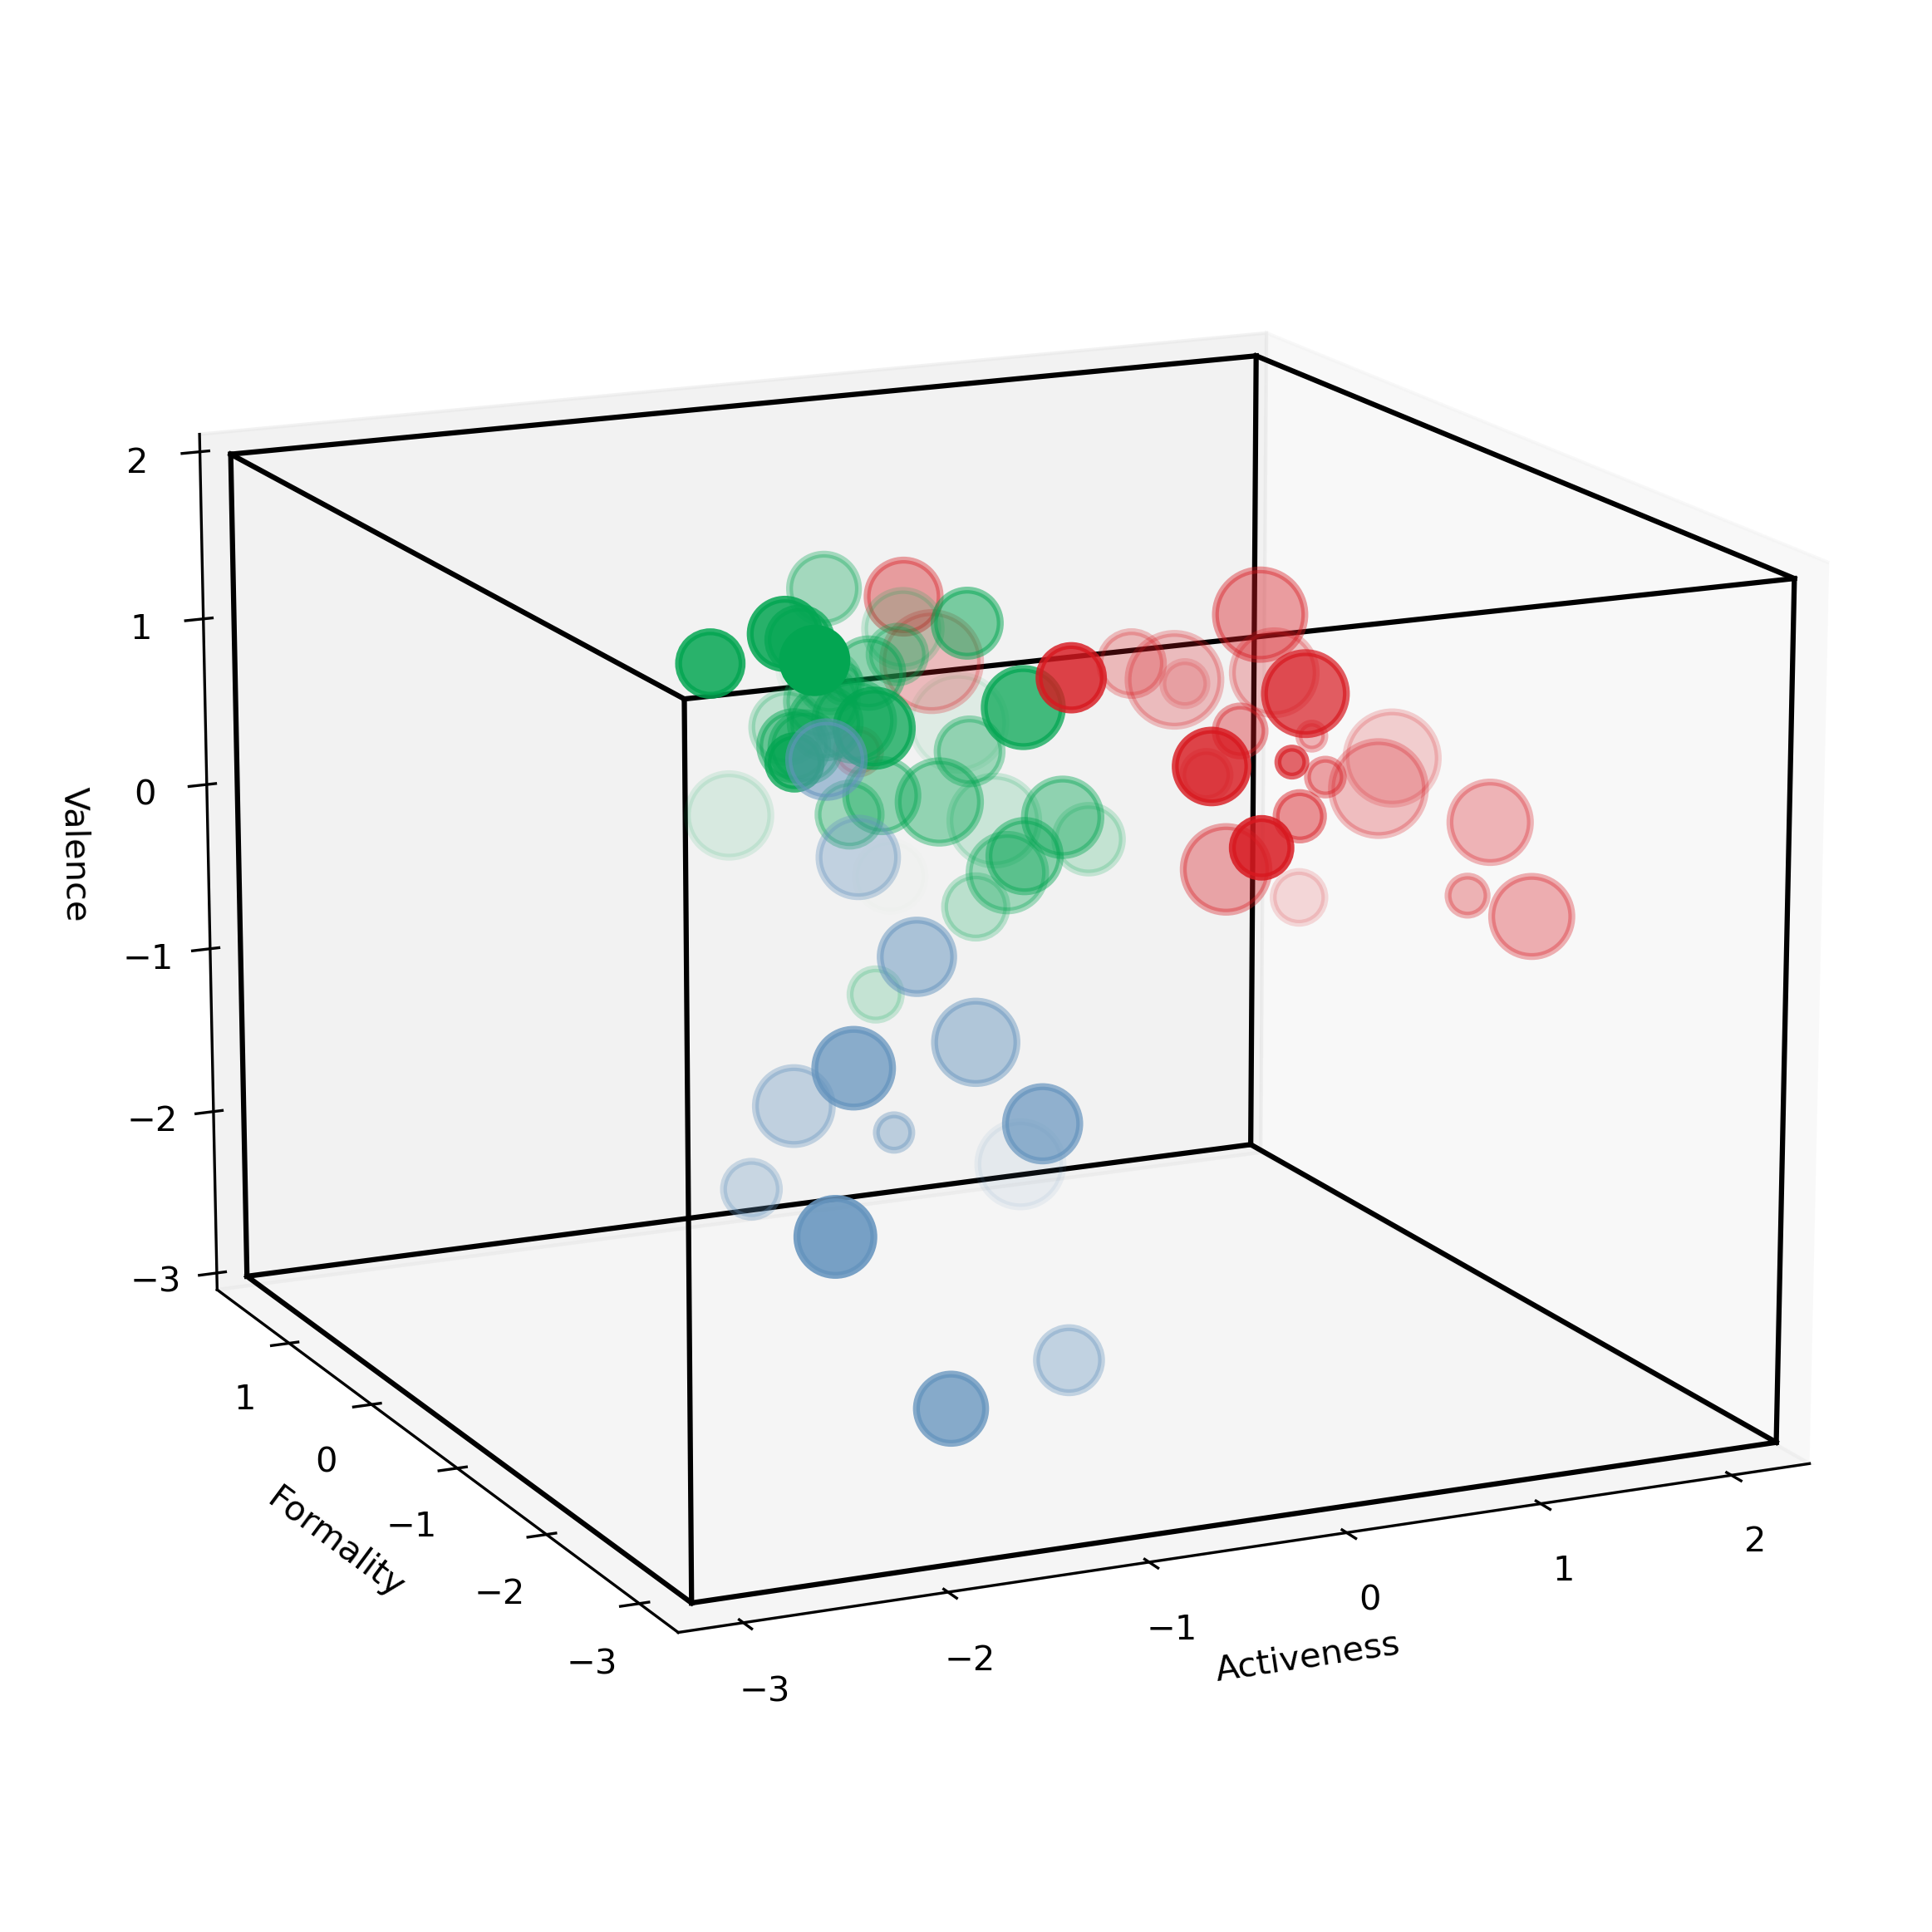

In [7]:
fig = plt.figure(figsize=(10,10),dpi=300)
ax = plt.axes(projection='3d')
mycolor = ["#03A652", # green
           "#D81920", # red
           "#6594BE" # blue
           ] 
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=3)

ax.scatter3D(pca_5c_3k['Activeness'],pca_5c_3k['Formality'], pca_5c_3k['Valence'], 
             s=pca_5c_3k['Equality_plot']*800, c=pca_5c_3k['cl_k3'],
             alpha = pca_5c_3k['Exchange_plot'],
             linewidth = 2,
             cmap = cmaps)
ax.set_xlim(-3.2,2.3)
ax.set_ylim(-3.3,1.8)
ax.set_zlim(-3,2)

ax.view_init(15, -115)

# First remove fill
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

#ax.set_axis_off()

ax.set_xlabel('Activeness')
ax.set_ylabel('Formality')
ax.set_zlabel('Valence')


limits = np.array([[-3.2,2.3],
                   [-3.3,1.8],
                   [-3,2]])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='black', ls='-')

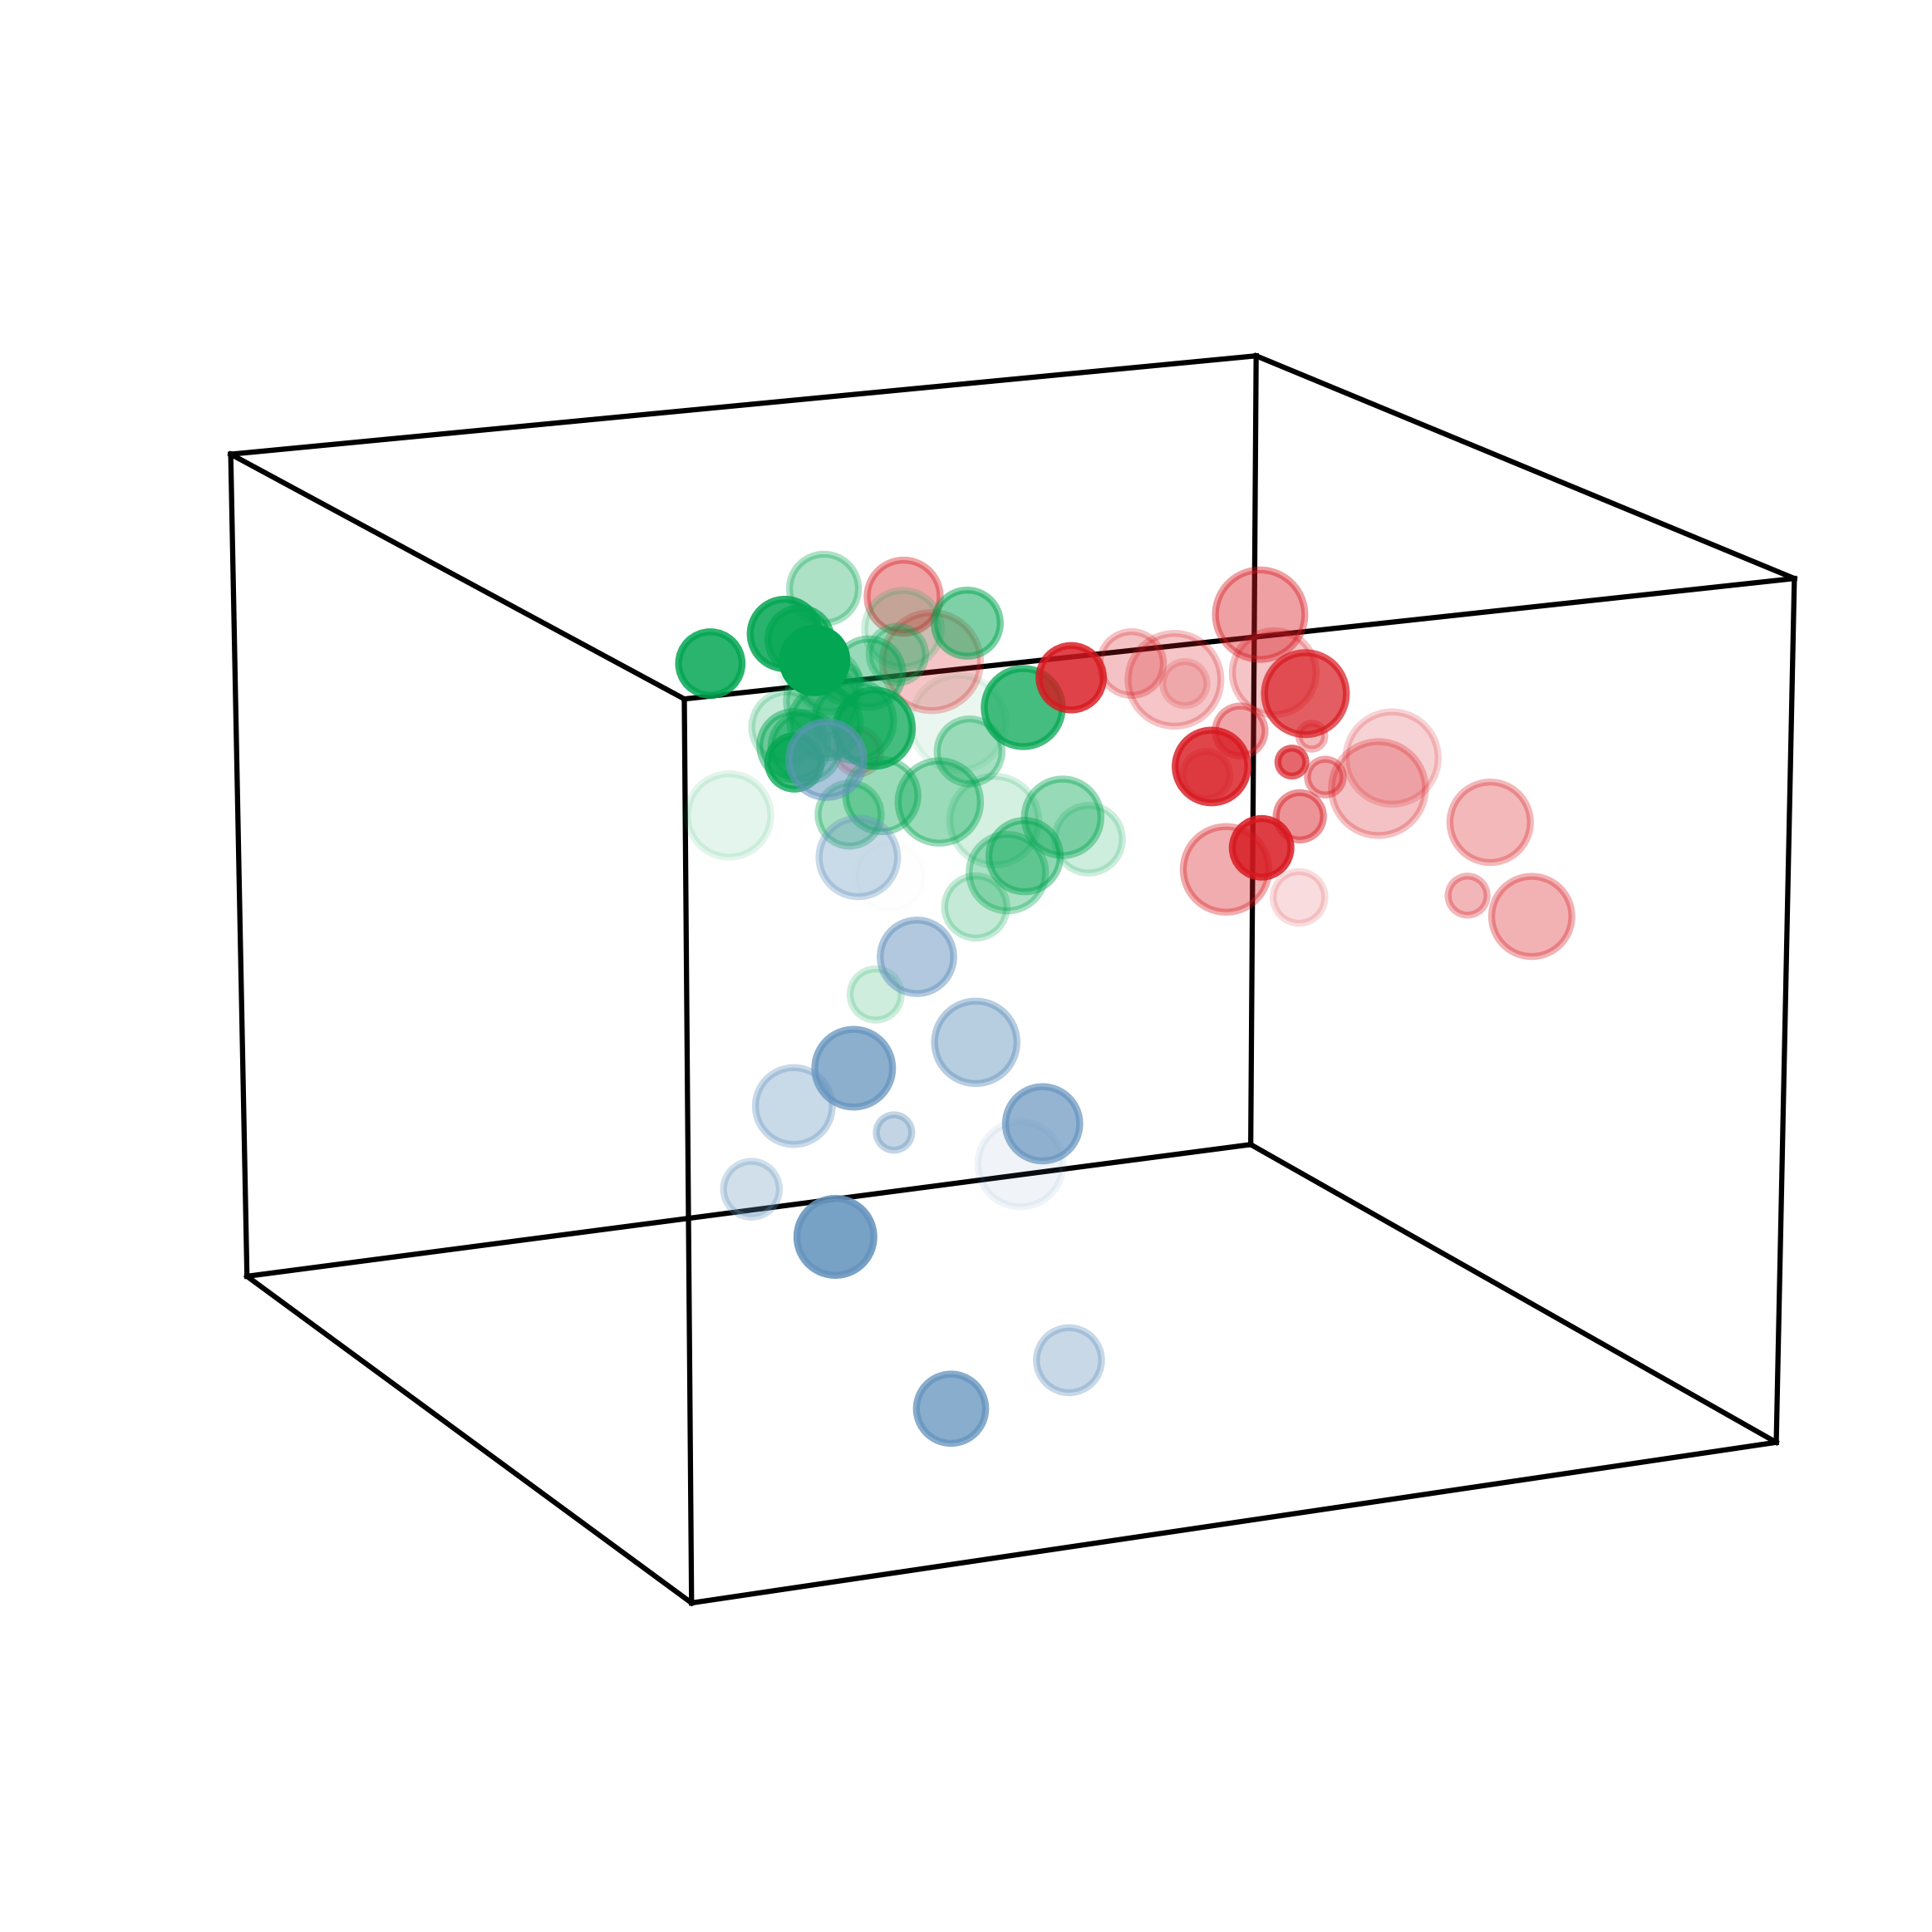

In [8]:
fig = plt.figure(figsize=(10,10),dpi=300)
ax = plt.axes(projection='3d')
mycolor = ["#03A652", # green
           "#D81920", # red
           "#6594BE" # blue
           ] 
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=3)

ax.scatter3D(pca_5c_3k['Activeness'],pca_5c_3k['Formality'], pca_5c_3k['Valence'], 
             s=pca_5c_3k['Equality_plot']*800, c=pca_5c_3k['cl_k3'],
             alpha = pca_5c_3k['Exchange_plot'],
             linewidth = 2,
             cmap = cmaps)
ax.set_xlim(-3.2,2.3)
ax.set_ylim(-3.3,1.8)
ax.set_zlim(-3,2)

ax.view_init(15, -115)

# First remove fill
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

#ax.set_axis_off()

ax.set_axis_off()

ax.set_xlabel('Activeness')
ax.set_ylabel('Formality')
ax.set_zlabel('Valence')

limits = np.array([[-3.2,2.3],
                   [-3.3,1.8],
                   [-3,2]])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='black', ls='-')

In [9]:
pca_5c_3k.to_csv('mosuo_5c_3k.csv')